In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns

In [2]:
data = pd.read_csv("spam.csv",encoding = 'latin1')
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'type', 'v2': 'email'})


data1 = pd.read_csv("m_spam.csv",header = None)

dataset = pd.concat([data,data1])
dataset['type'] = dataset['type'].replace('ham','Ham')
dataset['type'] = dataset["type"].replace("spam","Spam")


dataset = pd.read_csv('dataset.csv')

C:\Users\retr0man99\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [3]:
dataset

,type,email
0,Ham,"Go until jurong point, crazy.. Available only ..."
1,Ham,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Ham,U dun say so early hor... U c already then say...
4,Ham,"Nah I don't think he goes to usf, he lives aro..."
5,Spam,FreeMsg Hey there darling it's been 3 week's n...
6,Ham,Even my brother is not like to speak with me. ...
7,Ham,As per your request 'Melle Melle (Oru Minnamin...
8,Spam,WINNER!! As a valued network customer you have...
9,Spam,Had your mobile 11 months or more? U R entitle...


In [4]:
dataset.shape

(7572, 2)

In [5]:
dataset.head()

,type,email
0,Ham,"Go until jurong point, crazy.. Available only ..."
1,Ham,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Ham,U dun say so early hor... U c already then say...
4,Ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
dataset.groupby('type').describe()

email                                                               
     count unique                                                top freq
type                                                                     
Ham   5838   5529                             Sorry, I'll call later   30
Spam  1734   1640  Please call our customer service representativ...    4

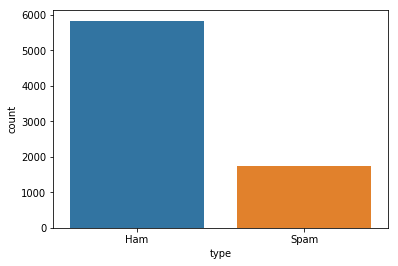

In [7]:
sns.countplot(dataset['type'])

In [8]:
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
corpus = []

In [9]:
for i in range(0,7572):
    review = re.sub('[^a-zA-Z]',' ',dataset['email'][i])
    review = review.lower()
    review = review.split()

    s = [word for word in review if word not in stop_words]
    s = [ps.stem(word) for word in s]
    s = " ".join(s)
    corpus.append(s)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
features = vectorizer.fit_transform(corpus).toarray()

In [11]:
features.shape

(7572, 5000)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(dataset['type'])

In [13]:
print(dataset["type"])

0        Ham
1        Ham
2       Spam
3        Ham
4        Ham
5       Spam
6        Ham
7        Ham
8       Spam
9       Spam
10       Ham
11      Spam
12      Spam
13       Ham
14       Ham
15      Spam
16       Ham
17       Ham
18       Ham
19      Spam
20       Ham
21       Ham
22       Ham
23       Ham
24       Ham
25       Ham
26       Ham
27       Ham
28       Ham
29       Ham
        ... 
7542     Ham
7543     Ham
7544     Ham
7545     Ham
7546     Ham
7547     Ham
7548     Ham
7549     Ham
7550     Ham
7551     Ham
7552     Ham
7553     Ham
7554     Ham
7555     Ham
7556     Ham
7557     Ham
7558     Ham
7559     Ham
7560     Ham
7561     Ham
7562     Ham
7563     Ham
7564     Ham
7565     Ham
7566     Ham
7567     Ham
7568     Ham
7569     Ham
7570     Ham
7571     Ham
Name: type, Length: 7572, dtype: object


In [14]:
print(labels[0:250])

[0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [15]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.2,random_state=0)

In [16]:
print(features_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
print(features_train.shape)

(6057, 5000)


In [18]:
# Naive Bayes Classification
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(features_train,labels_train)

# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(features_train,labels_train)

# Bernauli Naive Bayes
# from sklearn.naive_bayes import BernoulliNB
# classifier = BernoulliNB()
# classifier.fit(features_train,labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
labels_pred = classifier.predict(features_test)

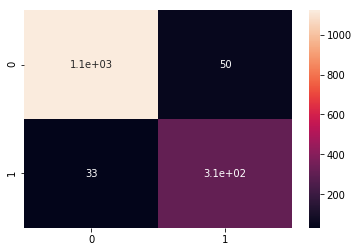

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test,labels_pred)
sns.heatmap(cm,annot=True)
plt.show()


In [21]:
from sklearn.metrics import classification_report
print(classification_report(labels_test,labels_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1171
           1       0.86      0.90      0.88       344

   micro avg       0.95      0.95      0.95      1515
   macro avg       0.92      0.93      0.92      1515
weighted avg       0.95      0.95      0.95      1515



In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=features_train,y=labels_train,cv= 10)

In [23]:
accuracies

array([0.93729373, 0.96039604, 0.9620462 , 0.95709571, 0.95379538,
       0.95049505, 0.94389439, 0.9553719 , 0.95371901, 0.96363636])

In [24]:
accuracies.mean()

0.9537743774377437

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[1,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.4,1.4,1.3,1.2,0.5,0.1,0],'fit_prior':[True,False]}
grid = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',n_jobs=-1,cv = 10)

In [26]:
grid = grid.fit(features_train,labels_train)

In [27]:
grid.best_score_

0.9572395575367344

In [28]:
grid.best_params_

{'alpha': 0.1, 'fit_prior': True}

In [29]:
y_pred = grid.predict(features_test)

[[1129   42]
 [  32  312]]


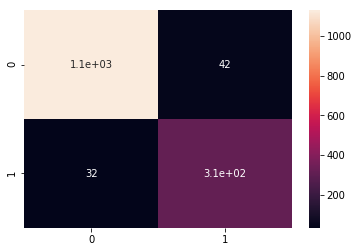

In [30]:
cma = confusion_matrix(labels_test,y_pred)
print(cma)
sns.heatmap(cma,annot=True)

In [36]:


mail = input("Enter a email :")

Enter a email :free books available


In [37]:
review1 = re.sub('[^a-zA-Z]',' ',mail)
review1 = review1.lower()
review1 = review1.split()
s1 = [word for word in review1 if word not in stop_words]
s1 = [ps.stem(word) for word in s1]
s1 = " ".join(s1)

In [38]:
s1

'free book avail'

In [39]:
feature = vectorizer.transform([s1]).toarray()

In [40]:
grid.predict(feature)

array([0])